# GAMASI: Generic Asynchronous Multi-Agent Simulation Invoker

## Running simulation

In [1]:
import numpy as np

from src.Lab import Lab

lab = Lab()

In [2]:
simulation = lab.experiment(
    height=80, width=200,
    initial_population_count=300,
    max_total_duration=30, max_simulation_duration=6
)

Generating universe...	: Done in 0.067 s


Running simulation	: 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]


Interrupting population	: 1305...
Simulation succeed...	: Returning data... Done in 6.681 s


## Analysis

### Statistics

#### Gathering & computing

In [3]:
data = lab.gather_data(simulation)

Gathering timelines		: 100%|██████████| 2565/2565 [00:00<00:00, 3231718.16it/s]


In [4]:
data["agents_statistics"]

,generation,parents_count,dead,lifespan,children_count,birth_success,travelled_distance,actions_count,min_decision_duration,max_decision_duration,...,min_action_duration,max_action_duration,mean_action_duration,median_action_duration,std_action_duration,min_round_duration,max_round_duration,mean_round_duration,median_round_duration,std_round_duration
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,True,127736658,0,True,30,35,10661.0,4565480.0,...,561.0,10691.0,5.821771e+03,6022.0,2.707627e+03,172701.0,15338684.0,3.457310e+06,2980751.0,3.353909e+06
1,0,1,True,167603959,1,True,15,20,7615.0,20109.0,...,531.0,139272472.0,6.968619e+06,5230.0,3.114110e+07,165497.0,140500052.0,8.546156e+06,1112069.0,3.197279e+07
2,0,1,True,250736508,1,True,12,20,9548.0,21030.0,...,1302.0,196587936.0,9.833820e+06,5560.5,4.395736e+07,137052.0,198139216.0,1.266714e+07,1242539.0,4.501379e+07
3,0,1,True,178242155,1,True,20,30,9719.0,53943.0,...,601.0,141488044.0,4.720969e+06,5405.5,2.583118e+07,173462.0,142669095.0,5.966040e+06,1026364.0,2.629709e+07
4,0,1,True,342658813,1,True,15,17,12243.0,28795.0,...,1944.0,265881240.0,1.564666e+07,7033.0,6.448398e+07,179203.0,267227177.0,2.045649e+07,1576027.5,6.594939e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,12,1,False,91942325,0,True,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,9,1,False,80390458,0,True,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2562,5,1,False,73941612,0,True,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data["agents_statistics"].to_csv("results/data.csv")

In [10]:
data["population_statistics"]

,min,max,mean,median,std
data,,,,,
lifespan,8677,6078050623,1.853214e+09,8.525613e+08,1.967174e+09
children_count,0,18,8.830409e-01,0.000000e+00,1.557894e+00
birth_success,False,True,9.953216e-01,1.000000e+00,6.825168e-02
travelled_distance,-1,190,1.098752e+01,6.000000e+00,1.611348e+01
actions_count,0,841,8.425848e+01,4.100000e+01,9.613032e+01
mean_decision_duration,8608.6,32747453.882353,6.817024e+04,1.594389e+04,7.415023e+05
mean_action_duration,951.8,108446079.75,1.286574e+06,5.289455e+03,4.113686e+06
mean_round_duration,186066.0,195743831.333333,2.139329e+07,2.081218e+07,1.823322e+07


#### Plotting some stats

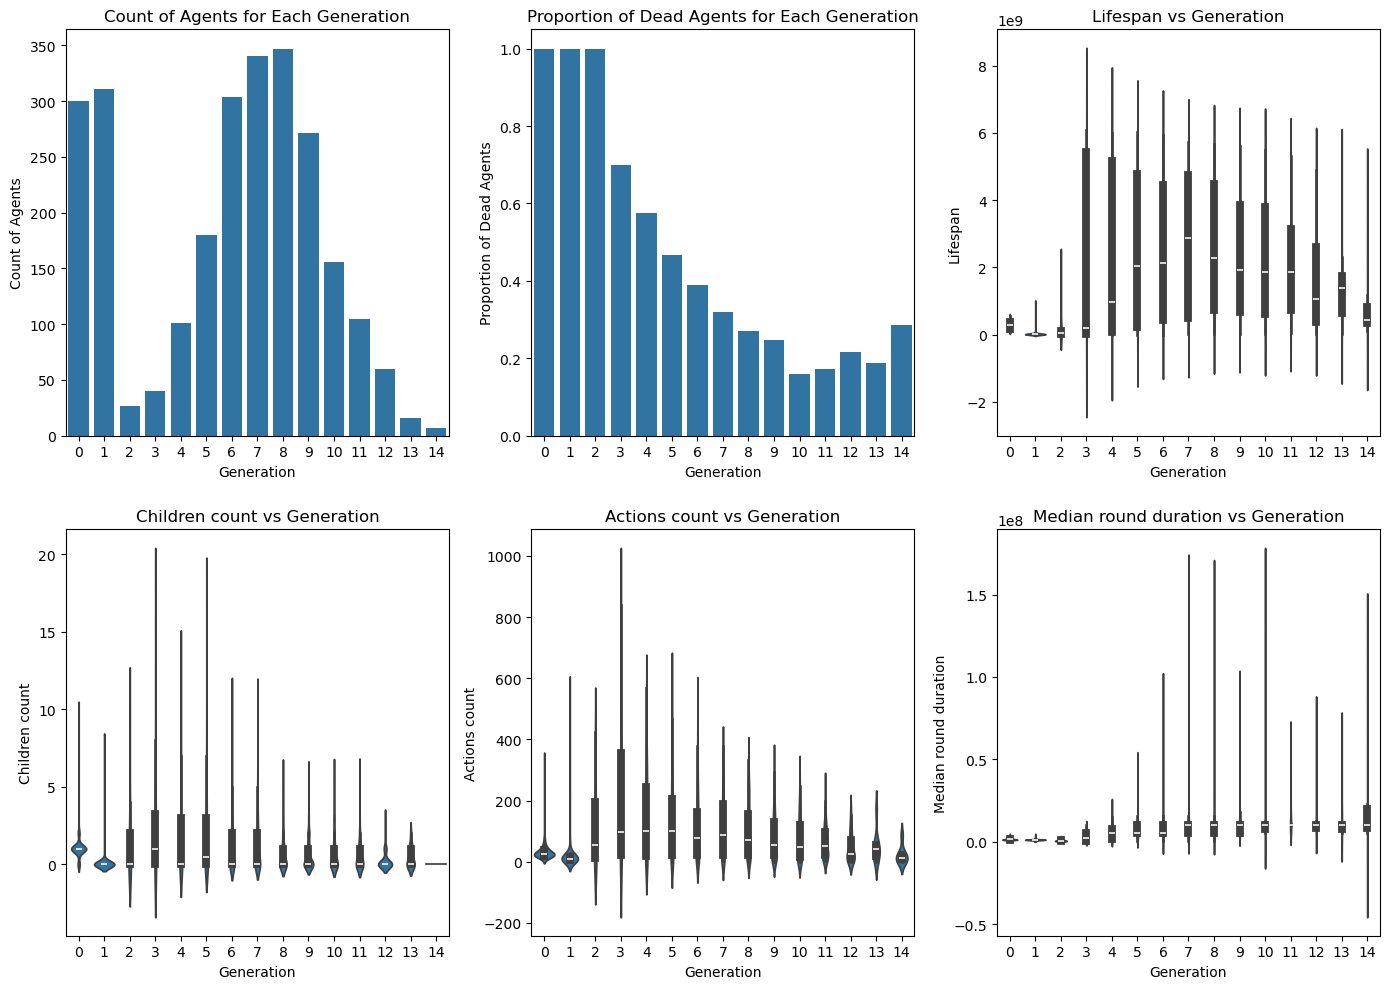

In [11]:
lab.plot_generation_stats(data)

### Timelines

#### Population count

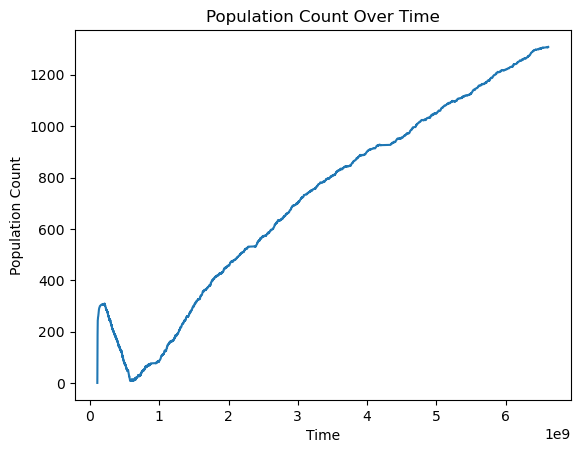

In [12]:
from matplotlib import pyplot as plt  # TODO Move to Lab
data["population_timeline"].plot(y="population_count", legend=False)
plt.title('Population Count Over Time')
plt.xlabel('Time')
plt.ylabel('Population Count')
plt.show()

#### Spatial evolution

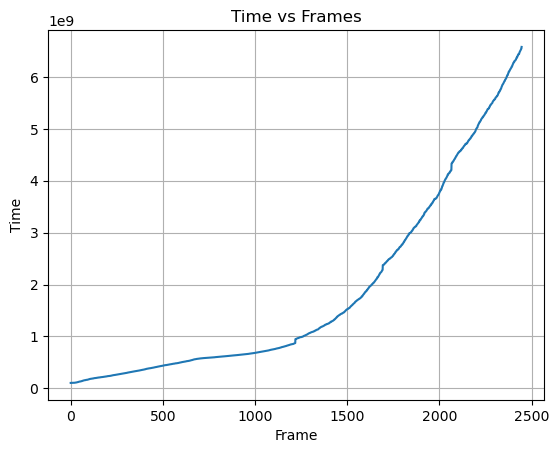

2447


In [13]:
import matplotlib.pyplot as plt

positions = data["positions"][0]

plt.plot(range(len(positions)), positions)
plt.xlabel('Frame')
plt.ylabel('Time')
plt.title('Time vs Frames')
plt.grid(True)
plt.show()
print(len(data["positions"][1]))

In [14]:
import imageio


gif_path = "results/output.gif"
imageio.mimsave(gif_path, data["positions"][1], duration=0.01, loop=0)

In [15]:
from IPython.display import HTML
width = 1000
# Generate HTML to display the GIF with specified width and interpolation
html_code = f'<img src="{gif_path}" width="{width}" style="image-rendering: pixelated;">'
HTML(html_code)

In [16]:
import numpy as np
import tifffile

# Assuming 'stack' is your array containing 2D numpy arrays
# 'stack' should be a list or array of 2D numpy arrays

# Convert the list of 2D arrays into a 3D numpy array
stack_3d = np.stack(data["positions"][1], axis=0)

# Save the stack as a TIFF file
tifffile.imwrite('results/stacks/positions.tif', stack_3d)

#### Actions

In [17]:
# TODO